## **Análise: desastre do Titanic**

**Autor:** Rodolfo Viana<br>
**Data:** 17 de novembro de 2018<br>
**Arquivo:** `titanic-data-6.csv`

Vamos fazer uma análise descritiva do desastre do Titanic a partir de dados fornecidos pela plataforma Kaggle. Esta análise é o projeto final do nanodegree Fundamentos de Ciência de Dados I, da Udacity.

In [1]:
# Importação e configuração de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None) # Por hábito, uso 'None' em 'display.max_rows' para não ter limite de linhas no output
sns.set(style='darkgrid', font_scale=1.2) # Grid escuro e fonte levemente maior

In [2]:
# Leitura dos dados
titanic = pd.read_csv('data/titanic-data-6.csv') # O arquivo `.csv` está em na pasta `data`

In [3]:
# Observação dos cinco primeiros registros
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Definições dos headers de acordo com o Kaggle:

| Variável | Definição | Chaves | Observação |
|----------|-----------|--------|------------|
| PassengerId | ID do passageiro | - | - |
| Survived | Se sobreviveu ao acidente | 0 = Não, 1 = Sim | - |
| Pclass | Classe da passagem | 1 = primeira, 2 = segunda, 3 = terceira | - |
| Name | Nome do passageiro | - | Sobrenome, Nome |
| Sex | Gênero | - | - |
| Age | Idade | - | Em anos, exceto quando menor de 1 ano ou quando estimado
| SibSp | Qtde de acompanhantes, quando irmãos ou cônjuge | - | Amantes e noivos/noivas são desconsiderados |
| Parch | Qtde de acompanhantes, quando pais ou filhos | - | Crianças que viajaram com babá, sem pais, recebem valor 0 |
| Ticket | Nº da passagem | - | - |
| Fare | Valor da passagem | - | - |
| Cabin | Nº da cabine | - | - |
| Embarked | Onde embarcou | C = Cherbourg, Q = Queenstown, S = Southampton | - |

Vamos traduzir ou mudar os headers para algo compreensível:

In [4]:
# Renomeação de colunas no dataframe
titanic.rename(columns={'PassengerId': 'id', 
                        'Survived': 'status_sobrevivencia', 
                        'Pclass': 'classe', 
                        'Name': 'nome', 
                        'Sex': 'genero', 
                        'Age': 'idade', 
                        'SibSp': 'conjuge_irmaos', 
                        'Parch': 'pais_filhos', 
                        'Ticket': 'passagem', 
                        'Fare': 'valor', 
                        'Cabin': 'cabine', 
                        'Embarked': 'porto_origem'}, 
               inplace=True) # `inplace=True` mas mudar no original, e não em cópia

In [5]:
# Checagem de dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
id                      891 non-null int64
status_sobrevivencia    891 non-null int64
classe                  891 non-null int64
nome                    891 non-null object
genero                  891 non-null object
idade                   714 non-null float64
conjuge_irmaos          891 non-null int64
pais_filhos             891 non-null int64
passagem                891 non-null object
valor                   891 non-null float64
cabine                  204 non-null object
porto_origem            889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Temos em análise 891 registros em 12 colunas. Em `idade`, `cabine` e `porto_origem` há valores nulos.

Vamos mudar, em `status_sobrevivencia` e `porto_origem`, as chaves pelo que elas representam. Assim não precisamos consultar a descrição sempre. Também em `genero`, para traduzir.

In [6]:
# Substituição dos valores com o uso de `map({dict})`
titanic['status_sobrevivencia'] = titanic['status_sobrevivencia'].map({0:'Não', 1:'Sim'})
titanic['porto_origem'] = titanic['porto_origem'].map({'C':'Cherbourg', 'Q':'Queenstown', 'S': 'Southampton'})
titanic['genero'] = titanic['genero'].map({'male':'Masculino', 'female':'Feminino'})

In [7]:
# Checagem dos dados
titanic.head()

,id,status_sobrevivencia,classe,nome,genero,idade,conjuge_irmaos,pais_filhos,passagem,valor,cabine,porto_origem
0,1,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,Southampton


### Pergunta 1: _Quem eram os passageiros do Titanic?_

Vamos fazer recortes por gênero, idade, se viajavam sozinhos ou com familiares, quanto pagaram pela passagem e em quais classes estavam.

In [8]:
# Contagem por gênero em valor absoluto
titanic['genero'].value_counts()

Masculino    577
Feminino     314
Name: genero, dtype: int64

In [9]:
# Contagem por gênero em valor percentual
titanic['genero'].value_counts(normalize=True) # `normalize=True` é usado para tomar o valor percentual

Masculino    0.647587
Feminino     0.352413
Name: genero, dtype: float64

No Titanic, 577 passageiros eram homens (64,75%) e 314 eram mulheres (35,24%). 

Vamos ver as idades. Antes, porém, vejamos quantos valores estão nulos:

In [10]:
# Contagem de idades nulas
titanic['idade'].isnull().sum() # `.isnull()` traz valores booleanos -- tendo `True` o valor de 1

177

Há 177 registros com valor nulo -- ou seja, sem idade.

Vamos ver as idades que constam nos registros válidos:

In [11]:
# Contagem por idade
titanic['idade'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.5

Temos a resposta, mas a sequência é longa demais para termos um panorama. Vamos ver um histograma:

c:\users\rodolfoviana\appdata\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


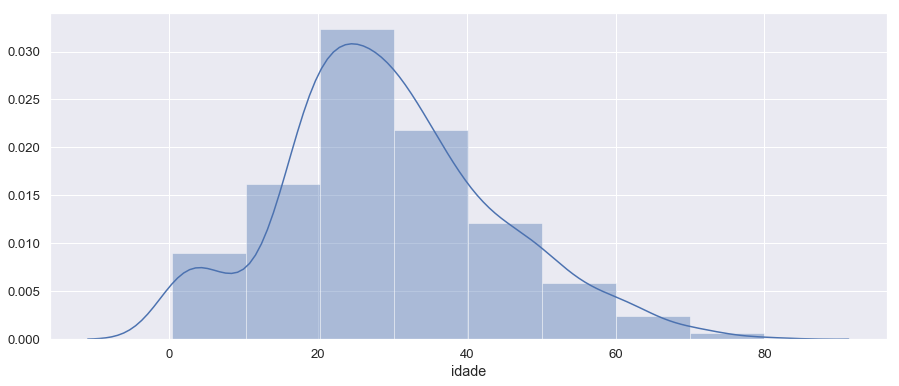

In [12]:
# Remoção de valores nulos
idade_valida = titanic[titanic['idade'].notnull()] # Sem isso, o histograma não funciona
f, ax = plt.subplots(figsize = (15, 6)) # Definição de tamanho
sns.distplot(idade_valida['idade'], bins=8); # Coloquei os dados em oito 'porções'

Pelo gráfico notamos que mais de 30% dos passageiros tinham idades entre 20 e 30 anos; mais de 20% tinham entre 30 e 40 anos; pouco mais de 15% tinham entre 10 e 20 anos.

Vamos cruzar `genero`e `idade`.

In [13]:
# Agrupamento por `idade` e `genero`, e contagem
titanic.groupby(['idade'])['genero'].value_counts()

idade  genero   
0.42   Masculino     1
0.67   Masculino     1
0.75   Feminino      2
0.83   Masculino     2
0.92   Masculino     1
1.00   Masculino     5
       Feminino      2
2.00   Feminino      6
       Masculino     4
3.00   Masculino     4
       Feminino      2
4.00   Feminino      5
       Masculino     5
5.00   Feminino      4
6.00   Feminino      2
       Masculino     1
7.00   Masculino     2
       Feminino      1
8.00   Feminino      2
       Masculino     2
9.00   Feminino      4
       Masculino     4
10.00  Feminino      1
       Masculino     1
11.00  Masculino     3
       Feminino      1
12.00  Masculino     1
13.00  Feminino      2
14.00  Feminino      4
       Masculino     2
14.50  Feminino      1
15.00  Feminino      4
       Masculino     1
16.00  Masculino    11
       Feminino      6
17.00  Masculino     7
       Feminino      6
18.00  Feminino     13
       Masculino    13
19.00  Masculino    18
       Feminino      7
20.00  Masculino    13
       Feminino  

Como está complicado ver a lista toda, vamos apresentar em gráfico:

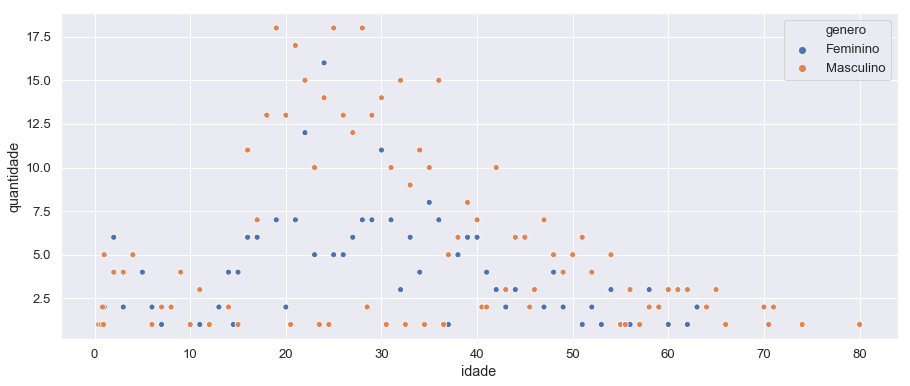

In [14]:
# Criação do gráfico
graf1 = titanic.groupby(['genero'])['idade'].value_counts() # Separamos por `genero`
graf1 = pd.DataFrame(graf1).rename(columns = {'idade': 'quantidade'}).reset_index() # Transformamos em dataframe
f, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='idade', y='quantidade', hue='genero', data=graf1);

Apesar de conseguirmos ter as idades por gênero, vamos categorizar por faixa etária. Isso facilita o trabalho:

In [15]:
# Criação de variável vazia
estagio = []

# Execução de `for loop` no dataset e anexação dos novos valores em `estagio`
for x in titanic['idade']:
    if x < 12:
        estagio.append('Menos de 12 anos')
    elif 12 <= x < 18:
        estagio.append('12 a 17 anos')
    elif 18 <= x < 30:
        estagio.append('18 a 29 anos')
    elif 30 <= x < 45:
        estagio.append('30 a 44 anos')
    elif 45 <= x < 60:
        estagio.append('45 a 59 anos') 
    elif x >= 60:
        estagio.append('60 anos ou mais')
    else:
        estagio.append('Não informado')

# Designação de nova coluna com os valores de `estagio`
titanic['estagio'] = estagio

# Mudança de eixos da tabela para melhor visualização
titanic.pivot_table(index=['estagio'], columns=['genero'], values='nome', aggfunc='count')

genero,Feminino,Masculino
estagio,,
12 a 17 anos,23,22
18 a 29 anos,92,179
30 a 44 anos,78,137
45 a 59 anos,32,57
60 anos ou mais,4,22
Menos de 12 anos,32,36
Não informado,53,124


Observamos a existência de:

- 68 crianças (36 meninos e 32 meninas)
- 45 adolescentes (22 garotos e 23 garotas)
- 271 jovens adultos (179 homens e 92 mulheres)
- 215 adultos até 44 anos (137 homens e 78 mulheres)
- 89 adultos de 45 a 59 anos (57 homens e 32 mulheres)
- 26 idosos (22 homens e 4 mulheres)
- 177 sem idade informada (124 homens e 53 mulheres)

Vamos ver quantos estavam viajando sozinhos e quantos estavam acompanhados:

In [16]:
# Definição de 'sozinho' ou 'acompanhado' a partir de `for loop` em duas colunas
sozinho_acompanhado = []
for x, y in zip(titanic['conjuge_irmaos'], titanic['pais_filhos']):
    if x == 0 and y == 0:
        sozinho_acompanhado.append('Sozinho')
    else:
        sozinho_acompanhado.append('Acompanhado')

# Designação de nova coluna com os valores de `sozinho_acompanhado`
titanic['sozinho_acompanhado'] = sozinho_acompanhado

# Alteração de eixos
titanic.pivot_table(index=['genero'], columns=['sozinho_acompanhado'], values='nome', aggfunc='count')

sozinho_acompanhado,Acompanhado,Sozinho
genero,,
Feminino,188,126
Masculino,166,411


Dos 577 homens, 411 viajavam sozinhos; 166 estavam acompanhados.

Entre as 314 mulheres, 188 estavam acompanhadas; 126, sozinhas.

Vejamos em que classe esses homens e mulheres estavam:

In [17]:
# Agrupamento por `genero` e contagem de `classe`
titanic.groupby('genero')['classe'].value_counts()

genero     classe
Feminino   3         144
           1          94
           2          76
Masculino  3         347
           1         122
           2         108
Name: classe, dtype: int64

Vamos cruzar com `estagio`:

In [18]:
# Agrupamento por `classe` e contagem de `estagio`
titanic.groupby('classe')['estagio'].value_counts()

classe  estagio         
1       30 a 44 anos         64
        45 a 59 anos         50
        18 a 29 anos         43
        Não informado        30
        60 anos ou mais      17
        12 a 17 anos          8
        Menos de 12 anos      4
2       18 a 29 anos         65
        30 a 44 anos         60
        45 a 59 anos         21
        Menos de 12 anos     17
        Não informado        11
        12 a 17 anos          6
        60 anos ou mais       4
3       18 a 29 anos        163
        Não informado       136
        30 a 44 anos         91
        Menos de 12 anos     47
        12 a 17 anos         31
        45 a 59 anos         18
        60 anos ou mais       5
Name: estagio, dtype: int64

Encontramos algo interessante: a maioria dos idosos (passageiros com 60 anos ou mais) viajava de primeira classe. 

Entre os adultos (passageiros de 30 a 59 anos), também é grande a proporção daqueles que viajavam na primeira classe.

Vejamos quanto custou a passagem de acordo com a classe, em média:

In [19]:
# Agrupamento por `classe` e descrição de `valor`
titanic.groupby('classe')['valor'].describe()

,count,mean,std,min,25%,50%,75%,max
classe,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Os resultados mostram os seguintes valores médios:

- primeira classe: 84,15
- segunda classe: 20,66
- terceira classe: 13,67

Também há indicação de que, em todas as classes, houve passageiro viajando de graça. Vamos ver quem:

In [20]:
# Subagrupamento de linhas com `valor` igual a zero
titanic[titanic['valor'] == 0]

,id,status_sobrevivencia,classe,nome,genero,idade,conjuge_irmaos,pais_filhos,passagem,valor,cabine,porto_origem,estagio,sozinho_acompanhado
179,180,Não,3,"Leonard, Mr. Lionel",Masculino,36.0,0,0,LINE,0.0,NaN,Southampton,30 a 44 anos,Sozinho
263,264,Não,1,"Harrison, Mr. William",Masculino,40.0,0,0,112059,0.0,B94,Southampton,30 a 44 anos,Sozinho
271,272,Sim,3,"Tornquist, Mr. William Henry",Masculino,25.0,0,0,LINE,0.0,NaN,Southampton,18 a 29 anos,Sozinho
277,278,Não,2,"Parkes, Mr. Francis ""Frank""",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
302,303,Não,3,"Johnson, Mr. William Cahoone Jr",Masculino,19.0,0,0,LINE,0.0,NaN,Southampton,18 a 29 anos,Sozinho
413,414,Não,2,"Cunningham, Mr. Alfred Fleming",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
466,467,Não,2,"Campbell, Mr. William",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
481,482,Não,2,"Frost, Mr. Anthony Wood ""Archie""",Masculino,NaN,0,0,239854,0.0,NaN,Southampton,Não informado,Sozinho
597,598,Não,3,"Johnson, Mr. Alfred",Masculino,49.0,0,0,LINE,0.0,NaN,Southampton,45 a 59 anos,Sozinho
633,634,Não,1,"Parr, Mr. William Henry Marsh",Masculino,NaN,0,0,112052,0.0,NaN,Southampton,Não informado,Sozinho


Todos os passageiros que viajaram de graça eram homens, sozinhos, e embarcaram em Southampton.

Voltando aos pagantes, vejamos em gráfico como fica a distribuição de valores:

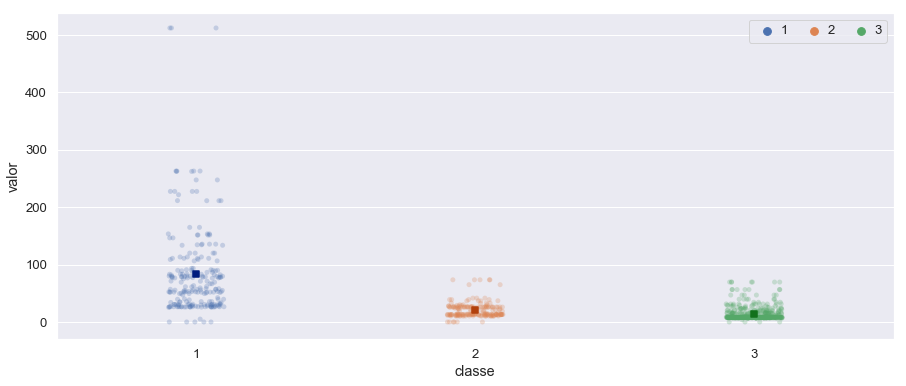

In [21]:
f, ax = plt.subplots(figsize = (15, 6))

# Criação do gráfico com todos os valores
sns.stripplot(x='classe', 
              y='valor', 
              hue='classe', 
              data=titanic, 
              jitter=True, 
              alpha=.25, 
              zorder=1)

# Criação do gráfico com apenas o quadrado de valor médio
sns.pointplot(x='classe', 
              y='valor', 
              hue='classe', 
              data=titanic, 
              jitter=True, 
              alpha=.25, 
              zorder=1, 
              join=False,
              palette='dark', 
              markers='s', 
              scale=.75, 
              ci=None)

# Organização de legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], 
          labels[:3], 
          handletextpad=0, 
          columnspacing=1, 
          ncol=3, 
          frameon=True);

### Pergunta 2: _Quem morreu no Titanic? E quem sobreviveu?_

Uma simples análise descritiva das vítimas fatais, e de quem saiu vivo.

Vamos começar por `genero`:

In [22]:
# Agrupamento por `genero` e contagem de cada valor de `status_sobrevivencia`
titanic.groupby('genero')['status_sobrevivencia'].value_counts()

genero     status_sobrevivencia
Feminino   Sim                     233
           Não                      81
Masculino  Não                     468
           Sim                     109
Name: status_sobrevivencia, dtype: int64

In [23]:
# Agrupamento por `genero` e percentual de cada valor de `status_sobrevivencia`
titanic.groupby('genero')['status_sobrevivencia'].value_counts(normalize=True)

genero     status_sobrevivencia
Feminino   Sim                     0.742038
           Não                     0.257962
Masculino  Não                     0.811092
           Sim                     0.188908
Name: status_sobrevivencia, dtype: float64

Temos registros de 314 mulheres no Titanic. Dessas, 233 sobreviveram -- ou seja, 74,2% do total de passageiros do sexo feminino.

Quanto aos homens, temos 577 sujeitos, dos quais 109 sobreviveram -- 18,9% do total do gênero masculino.

Vamos ver em gráfico:

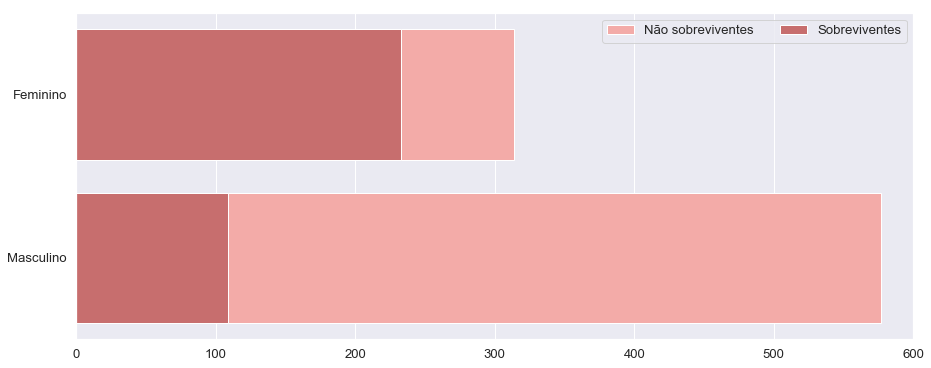

In [24]:
# Criação da coluna `total_genero`
titanic['total_genero'] = titanic.groupby(['genero'])['genero'].transform('count') # Esta coluna é para ser usada no gráfico

# Agrupamento por `genero` e `total_genero`, e contagem dos valores em `status_sobrevivencia`
genero_sobrev = titanic.groupby(['genero', 'total_genero'])['status_sobrevivencia'].value_counts()

# Conversão em dataframe com coluna renomeada para `quantidade`
genero_sobrev = pd.DataFrame(genero_sobrev).rename(columns = {'status_sobrevivencia': 'quantidade'}).reset_index()

# Separação dos valores 'Sim' em `status_sobrevivencia`
genero_sobrev_sim = genero_sobrev[genero_sobrev['status_sobrevivencia'] == 'Sim']

# Definição do tamanho do gráfico
f, ax = plt.subplots(figsize = (15, 6))

# Definição da barra em segundo plano
sns.set_color_codes('pastel') # Cor
sns.barplot(x = 'total_genero',
            y = 'genero', 
            data = genero_sobrev_sim,
            label = 'Não sobreviventes', 
            color = 'r', 
            ci = None)

# Definição da barra em primeiro plano
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'genero', 
            data = genero_sobrev_sim,
            label = 'Sobreviventes', 
            color = 'r', 
            ci = None)

# Posicionamento da legenda
ax.legend(ncol = 2, 
          loc = 'upper right', 
          frameon = True)

# Delimitação do eixo x e liquidação das labels
ax.set(xlim = (0, 600), 
       ylabel = '',
       xlabel = '');

Vejamos as faixas etárias de quem sobreviveu e de quem morreu:

In [25]:
# Agrupamento por `estagio` e contagem de `status_sobrevivencia`
titanic.groupby('estagio')['status_sobrevivencia'].value_counts()

estagio           status_sobrevivencia
12 a 17 anos      Não                      23
                  Sim                      22
18 a 29 anos      Não                     176
                  Sim                      95
30 a 44 anos      Não                     124
                  Sim                      91
45 a 59 anos      Não                      53
                  Sim                      36
60 anos ou mais   Não                      19
                  Sim                       7
Menos de 12 anos  Sim                      39
                  Não                      29
Não informado     Não                     125
                  Sim                      52
Name: status_sobrevivencia, dtype: int64

Vamos ver um gráfico disso:

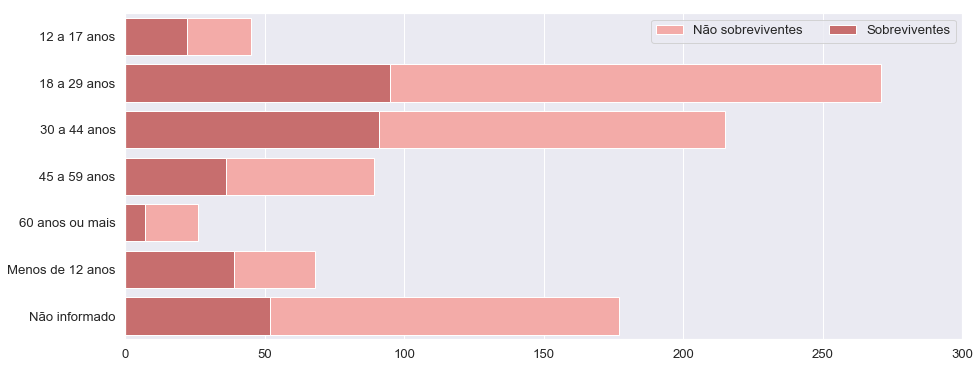

In [26]:
titanic['total_faixa'] = titanic.groupby(['estagio'])['estagio'].transform('count')
faixa_sobrev = titanic.groupby(['estagio', 'total_faixa'])['status_sobrevivencia'].value_counts()
faixa_sobrev = pd.DataFrame(faixa_sobrev).rename(columns = {'status_sobrevivencia': 'quantidade'}).reset_index()
faixa_sobrev_sim = faixa_sobrev[faixa_sobrev['status_sobrevivencia'] == 'Sim']
f, ax = plt.subplots(figsize = (15, 6))
sns.set_color_codes('pastel')
sns.barplot(x = 'total_faixa', 
            y = 'estagio', 
            data = faixa_sobrev_sim,
            label = 'Não sobreviventes', 
            color = 'r', 
            ci = None)
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'estagio', 
            data = faixa_sobrev_sim,
            label = 'Sobreviventes', 
            color = 'r', 
            ci = None)
ax.legend(ncol = 2, 
          loc = 'upper right', 
          frameon = True)
ax.set(xlim = (0, 300), 
       ylabel = '',
       xlabel = '');

O mesmo gráfico, mas com percentual:

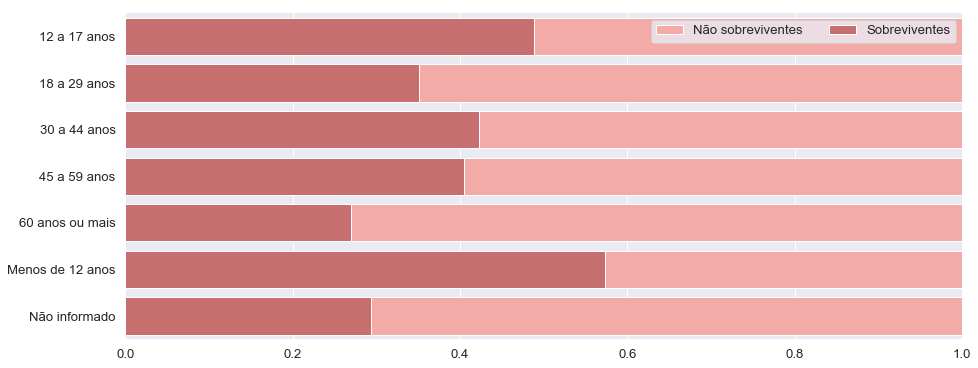

In [27]:
titanic['total_faixa'] = titanic.groupby(['estagio'])['estagio'].transform('count')
faixa_sobrev = titanic.groupby(['estagio', 'total_faixa'])['status_sobrevivencia'].value_counts(normalize=True)
faixa_sobrev = pd.DataFrame(faixa_sobrev).rename(columns = {'status_sobrevivencia': 'quantidade'}).reset_index()
faixa_sobrev_sim = faixa_sobrev[faixa_sobrev['status_sobrevivencia'] == 'Sim']
f, ax = plt.subplots(figsize = (15, 6))
sns.set_color_codes('pastel')
sns.barplot(x = 'total_faixa', 
            y = 'estagio', 
            data = faixa_sobrev_sim,
            label = 'Não sobreviventes', 
            color = 'r', 
            ci = None)
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'estagio', 
            data = faixa_sobrev_sim,
            label = 'Sobreviventes', 
            color = 'r', 
            ci = None)
ax.legend(ncol = 2, 
          loc = 'upper right', 
          frameon = True)
ax.set(xlim = (0, 1), 
       ylabel = '',
       xlabel = '')
sns.despine(left=True, bottom=True)

Vejamos em quais classes estavam os passageiros para ver se há prevalência de sobreviventes em alguma delas:

In [28]:
titanic.groupby('classe')['status_sobrevivencia'].value_counts()

classe  status_sobrevivencia
1       Sim                     136
        Não                      80
2       Não                      97
        Sim                      87
3       Não                     372
        Sim                     119
Name: status_sobrevivencia, dtype: int64

Notadamente há maior proporção de sobreviventes da primeira classe do que na segunda e na terceira. Vejamos em termos percentuais:

In [29]:
titanic.groupby('classe')['status_sobrevivencia'].value_counts(normalize=True)

classe  status_sobrevivencia
1       Sim                     0.629630
        Não                     0.370370
2       Não                     0.527174
        Sim                     0.472826
3       Não                     0.757637
        Sim                     0.242363
Name: status_sobrevivencia, dtype: float64

Temos:

- 62,96% dos passageiros da primeira classe sobreviveram;
- 47,28% dos da segunda classe;
- 24,23% dos da terceira classe.

---
**Leituras**

`pd.set_option`: [Options and settings](https://pandas.pydata.org/pandas-docs/stable/options.html), na documentação do Pandas<br>
`sns.set`: [seaborn.set](https://seaborn.pydata.org/generated/seaborn.set.html), na documentação do Seaborn<br>
`pd.series.map`: [Remap values in pandas column with a dict](https://stackoverflow.com/a/41678874), no Stack Overflow; [Pandas series map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html), na documentação do Pandas<br>
`pd.dataframe.pivot_table`: [Pandas dataframe pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html), na documentação do Pandas